# Tutorial: SQL e Jupyter Notebooks

O presente tutorial tem o objetivo de apresentar de forma prática a aplicação da linguagem SQL para extrair as informações de um banco de dados relacional.

Para tal, utilizaremos um ambiente baseado em [Jupyter Notebooks](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html). Um notebook Jupyter permite a execução de códigos [Python](https://docs.python.org/pt-br/3/tutorial/index.html) de forma interativa, além da composição de textos formatados e visualização de imagens e vídeos.

Utilizaremos as bibliotecas [`sqlite3`](https://docs.python.org/pt-br/3/library/sqlite3.html) e [`pandas`](https://pandas.pydata.org/) em nossos exemplos.

---

Tópicos do tutorial:

0. Jupyter Notebooks
1. Python
2. Pandas
3. SQL com `sqlite3`

# 0. Jupyter Notebooks

# `New section`

In [ ]:
print('hello world')

# 1. Python

In [ ]:
# declaring variables
var_str = 'Lorem ipsum dolor sit amet, ...'
var_int = 42
var_float = 3.141519
var_bool = False
var_list = [1, 2, 'a']
var_dict = {'key_1': 'value', 'key_2': 1}

formatted_str_with_variables = f'{var_str} | {var_int} | {var_float:.2f} | {var_bool}'

In [ ]:
# printing multiple types of variables
print(formatted_str_with_variables)
print(var_str)
print(var_int)
print(var_float)
print(var_list)
print(var_dict)

In [ ]:
# nice single line comment

"""
nice
multiline
comment
"""

In [ ]:
# nice conditions
if var_bool:
    print(' :D ')
else:
    print(' :) ')

In [ ]:
# iterating list
for element in var_list:
    print(element)

In [ ]:
# iterating dict
for k,v in var_dict.items():
    print(f'key: {k} => value: {v}')

# 2. Pandas

Pandas é uma biblioteca Python open source que fornece estruturas de dados de alto desempenho e fáceis de usar para processamento e análise de dados.

- [Features principais do Pandas em 10 minutos](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Documentação](http://pandas.pydata.org/pandas-docs/stable/)
- [Tutoriais](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)

In [ ]:
import pandas as pd

## 2.1 Importando um dataframe a partir de um arquivo¶

In [ ]:
import requests
import io

url = "https://homepages.dcc.ufmg.br/~rodrygo/static/ibd/music.csv"
csv = requests.get(url, verify=False).content
df = pd.read_csv(io.StringIO(csv.decode('utf-8')))

In [ ]:
df.columns

In [ ]:
df[['danceability', 'energy', 'loudness']].describe()

## 2.2 Acesso a colunas do dataframe

In [ ]:
df['artist'].sample(n=5)

In [ ]:
df[['song_name', 'artist', 'duration_ms']].sample(n=5)

## 2.3 Acesso a linhas do dataframe

In [ ]:
df.loc[42]

In [ ]:
df.loc[42:44]

## 2.4 Aplicando uma função à uma coluna

In [ ]:
def to_upper(s):
  return s.upper()

df['lyrics'] = df['lyrics'].astype('str')
df['lyrics'] = df['lyrics'].apply(to_upper)
df['lyrics']

## 2.5 Acessando linhas a partir de consulta com sintaxe própria da biblioteca

In [ ]:
# SELECT * WHERE song_name = 'Here'
df[df['song_name'] == 'Here']

# 3. SQL com `sqlite3`

SQLite é uma engine de banco de dados transacional autocontida que dispensa servidor e configuração. Através dela é possível importar um dump de banco de dados a partir de um arquivo `.sql`, realizar consultas e outras operações.

- [SQLite](https://www.sqlite.org/index.html)
- [Documentação da biblioteca `sqlite` em Python](https://docs.python.org/pt-br/3/library/sqlite3.html)
- [Tutoriais](https://www.tutorialspoint.com/sqlite/sqlite_python.htm)

Para os exemplos, utilizaremos o seguinte banco representado pelo schema abaixo:

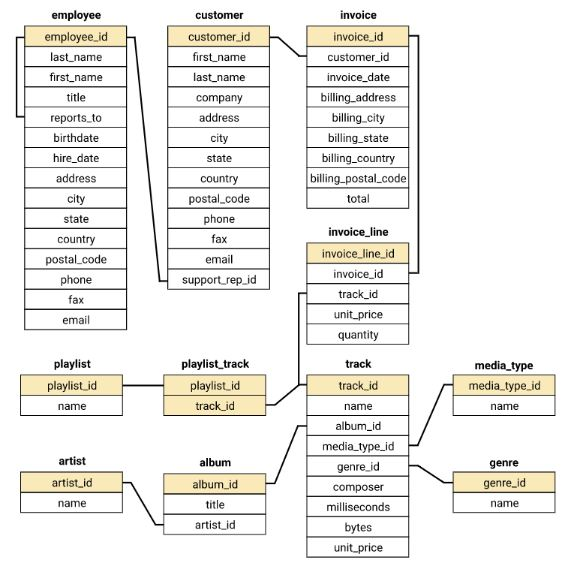

In [ ]:
import io
import sqlite3
import pandas as pd

# Download do dump:
!wget --no-check-certificate -P /tmp/ https://homepages.dcc.ufmg.br/~rodrygo/static/ibd/chinook.sql

## 3.1 Criação da conexão com o banco
No momento da conexão, é informado o nome do arquivo onde será montado o banco de dados. No nosso caso, este arquivo não precisa ser pré-existente, porque iremos carregar as informações de um dump

Se este comando for executado com um arquivo que já existe e possui as mesmas tabelas que serão criadas, ocorrerá um erro no momento da execução do script mais à frente

In [ ]:
conn = sqlite3.connect('/tmp/chinook.db')
cursor = conn.cursor()

## 3.2 Execução do script para carga do dump

Criada a conexão, iremos utilizar o arquivo .sql disponibilizado para recuperar o schema e os dados do banco.

In [ ]:
f = io.open('/tmp/chinook.sql', 'r', encoding='UTF-8')
sql = f.read()
cursor.executescript(sql)


## 3.3 Realizando consultas no banco de dados

Criada a conexão e realizada a carga dos dados no banco, pode ser executada qualquer consulta SQL.

O SQLite3 permite que o retorno dos dados seja feito em vários formatos. Utilizaremos o retorno em um dataframe Pandas.

## 3.3.1 Consulta 1
Liste as tabelas presentes no banco.

In [ ]:
query = """
SELECT name
FROM sqlite_master 
WHERE type = 'table'
"""

df = pd.read_sql_query(query, conn)
df

### 3.3.2 Consulta 2
Retorne os 5 primeiras albums, incluindo o nome do artista.

In [ ]:
query = """
SELECT *
FROM album
    NATURAL JOIN artist
LIMIT 5;
"""

df = pd.read_sql_query(query, conn)
df

### 3.3.3 Consulta 3
Retorne todos os albums do artista AC/DC.

In [ ]:
query = """
SELECT *
FROM album
    NATURAL JOIN artist
WHERE name = 'AC/DC'
"""

df = pd.read_sql_query(query, conn)
df

### 3.3.4 Consulta 4
Retorne todas as tracks do artista Aerosmith.

In [ ]:
query = """
SELECT *
FROM track
    JOIN album ON track.album_id = album.album_id
    JOIN artist ON (album.artist_id = artist.artist_id)
WHERE artist.name = 'Aerosmith';
"""

# NATURAL JOIN retorna conjunto vazio, por conta da ocorrência
# de duas colunas de mesmo nome (artist_id, name)
#
# query = """
# SELECT *
# FROM track
#     NATURAL JOIN album
#     NATURAL JOIN artist
# WHERE artist.name = 'Aerosmith';
# """


df = pd.read_sql_query(query, conn)
df

### 3.3.5 Consulta 5
Retorne todas as playlists, ordenadas pelo número de tracks em cada playlist.

In [ ]:
query = """
SELECT P.playlist_id, name, COUNT(*) AS tracks
FROM playlist P
    JOIN playlist_track PT ON P.playlist_id = PT.playlist_id
GROUP BY P.playlist_id
ORDER BY tracks DESC
LIMIT 5
"""

df = pd.read_sql_query(query, conn)
df

### 3.3.6 Consulta 6
Retorne tracks incluídas na playlist Brazilian Music.

In [ ]:
query = """
SELECT T.name
FROM playlist P
    JOIN playlist_track PT ON P.playlist_id = PT.playlist_id
    JOIN track T ON PT.track_id = T.track_id
WHERE P.name = 'Brazilian Music';
"""

df = pd.read_sql_query(query, conn)
df

### 3.3.7 Fechamento da conexão com o banco

Após serem realizadas todas as consultas necessárias, é recomendado encerrar formalmente a conexão com o banco de dados

In [ ]:
conn.close()